<a href="https://colab.research.google.com/github/priyankamunasa/Sentimental-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk wordcloud scikit-learn matplotlib seaborn --quiet
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


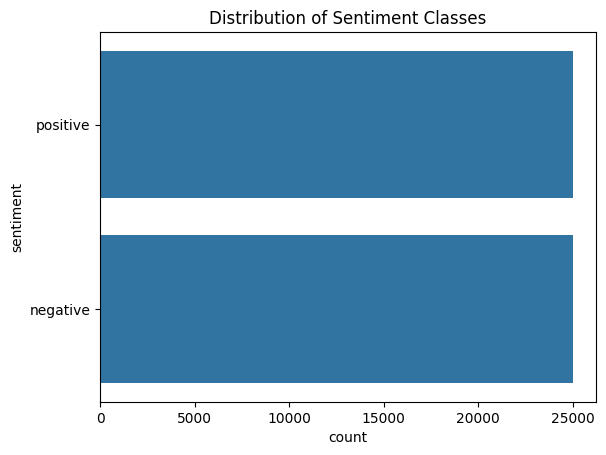

In [ ]:
plt.title("Distribution of Sentiment Classes")
sns.countplot(data['sentiment'])
plt.show()


In [ ]:
from nltk.tokenize import RegexpTokenizer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')


def preprocess(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    tokens = tokenizer.tokenize(text)
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['review'].apply(preprocess)

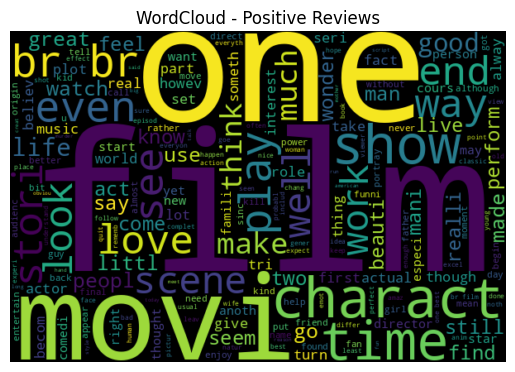

In [ ]:
pos_text = " ".join(data[data["sentiment"] == "positive"]["clean_text"])
wordcloud = WordCloud(width=600, height=400).generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()


In [ ]:
data = data[data["sentiment"] != "neutral"].copy()
data['label'] = data['sentiment'].map({"positive": 1, "negative": 0})

X = data["clean_text"]
y = data["label"]

vectorizer = TfidfVectorizer(max_features=1000)
X_vec = vectorizer.fit_transform(X)

model = LogisticRegression()
model.fit(X_vec, y)

y_pred = model.predict(X_vec)

print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

Confusion Matrix:
 [[21555  3445]
 [ 2918 22082]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     25000
           1       0.87      0.88      0.87     25000

    accuracy                           0.87     50000
   macro avg       0.87      0.87      0.87     50000
weighted avg       0.87      0.87      0.87     50000

Accuracy: 0.87274


Overall Sentiment Summary:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


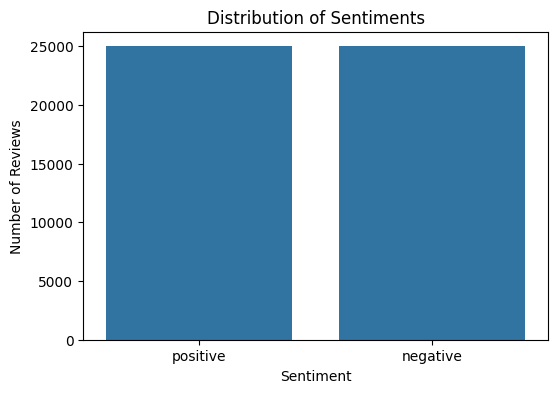

In [ ]:
sentiment_counts = data['sentiment'].value_counts()
print("Overall Sentiment Summary:")
print(sentiment_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()